In [19]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os

data_path = '/content/drive/MyDrive/complete_set'
print(os.listdir(data_path))


['training_set', 'testing_set']


In [6]:
import os

base_path = '/content/drive/MyDrive/complete_set'
train_dir = os.path.join(base_path, 'training_set')
test_dir = os.path.join(base_path, 'testing_set')

# Show some sample files
print("Train files:", os.listdir(train_dir)[:5])
print("Test files:", os.listdir(test_dir)[:5])


Train files: ['benign', 'malignant']
Test files: ['P016_mask.png', 'P028.png', 'P011_mask.png', 'P024.png', 'P006_mask.png']


In [10]:
import os

train_dir = '/content/drive/MyDrive/complete_set/training_set'
benign_dir = os.path.join(train_dir, 'benign')
malignant_dir = os.path.join(train_dir, 'malignant')


# Show some image files
print("Sample benign images:", os.listdir(benign_dir)[:5])


Sample benign images: ['benign (140)_mask.png', 'benign (116).png', 'benign (112).png', 'benign (111).png', 'benign (147)_mask.png']


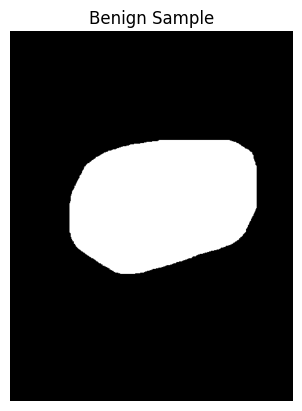

In [9]:
from PIL import Image
import matplotlib.pyplot as plt

# Load one sample image from the benign class
image_path = os.path.join(benign_dir, os.listdir(benign_dir)[0])
img = Image.open(image_path)

plt.imshow(img)
plt.axis('off')
plt.title("Benign Sample")
plt.show()


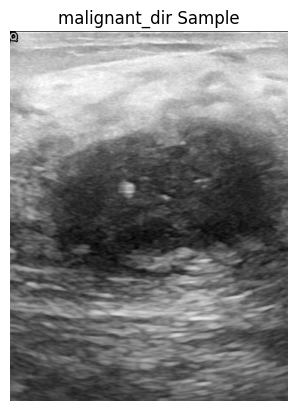

In [12]:
from PIL import Image
import matplotlib.pyplot as plt

# Load one sample image from the benign class
image_path = os.path.join(malignant_dir, os.listdir(malignant_dir)[0])
img = Image.open(image_path)

plt.imshow(img)
plt.axis('off')
plt.title("malignant_dir Sample")
plt.show()


**Load and Preprocess Images**

In [13]:
import os
import numpy as np
from PIL import Image
from sklearn.utils import shuffle

# Define image size (smaller to reduce computation)
IMG_SIZE = (64, 64)

# Priority mapping
label_map = {
    'benign': 'Low',
    'malignant': 'High'
}

def load_images_from_folder(folder_path, label):
    data = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            img = Image.open(file_path).convert('RGB')
            img = img.resize(IMG_SIZE)
            img_array = np.array(img).flatten()  # Flatten image
            data.append((img_array, label_map[label]))
        except:
            continue
    return data

# Load both classes
benign_data = load_images_from_folder(benign_dir, 'benign')
malignant_data = load_images_from_folder(malignant_dir, 'malignant')

# Combine and shuffle
dataset = benign_data + malignant_data
dataset = shuffle(dataset, random_state=42)

# Split into X and y
X = np.array([x[0] for x in dataset])
y = np.array([x[1] for x in dataset])

print("Data shape:", X.shape)
print("Labels:", np.unique(y))


Data shape: (1112, 12288)
Labels: ['High' 'Low']


**Encode labels & train/test split**

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode priority labels (Low=0, High=1)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 889
Testing samples: 223


**Train Random Forest Model**

In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [16]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1])

Evaluate Performance



Accuracy: 0.8026905829596412
F1 Score: 0.7898797051606835

Classification Report:
               precision    recall  f1-score   support

        High       0.72      0.49      0.58        63
         Low       0.82      0.93      0.87       160

    accuracy                           0.80       223
   macro avg       0.77      0.71      0.73       223
weighted avg       0.79      0.80      0.79       223



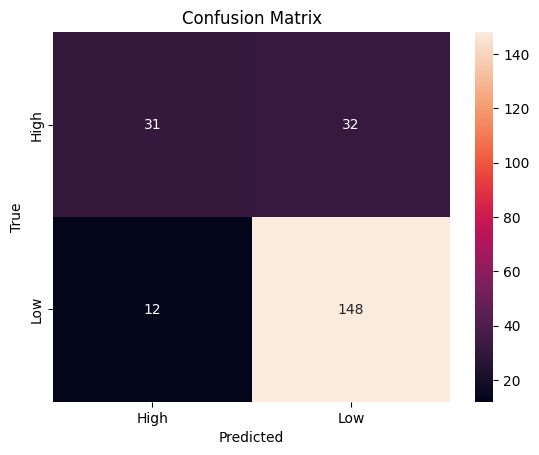

In [18]:
import seaborn as sns


from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Strengths:


The model performs very well on Low priority cases (F1 = 0.87).

Overall accuracy is high (80%).

🔹 Weakness:


Recall for High priority cases is low (0.49):

This means over half of the High-priority issues are misclassified.

This could be risky in a real-world resource allocation system where High priority cases are critical.